In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np

df_all = pd.read_csv("labelled_test_rez.csv",sep=",")
df_all

,Unnamed: 0,Method,test_pearson,plain_pearson,delta_pearson,test_spearman,plain_spearman,delta_spearman,test_RMSE,type,mass_balance
0,0,ACDC-NN,0.525037,0.604194,-0.079156,0.494676,0.561725,-0.067049,1.341147,transfer,y
1,1,ACDC-NN-Seq,0.498594,0.570004,-0.071410,0.475371,0.539295,-0.063924,1.352879,transfer,y
2,2,Cartddg,0.490625,0.596848,-0.106224,0.520602,0.607043,-0.086441,1.199784,biophysical,y
3,3,DDGun3D,0.538380,0.634511,-0.096131,0.497299,0.582494,-0.085195,1.308767,untrained,y
4,4,DUET,0.355570,0.593102,-0.237533,0.393861,0.573088,-0.179228,1.442766,supervised,y
5,5,Dynamut,0.387477,0.504483,-0.117006,0.397507,0.440396,-0.042889,1.447160,other,y
6,6,Dynamut2,0.335814,0.504483,-0.168669,0.364707,0.440396,-0.075689,1.499287,other,y
7,7,Evo,0.368869,0.463202,-0.094333,0.401303,0.461859,-0.060555,1.433443,biophysical,n
8,8,FoldX,0.359658,0.221282,0.138377,0.381394,0.349134,0.032260,1.419630,biophysical,n
9,9,I-Mutant3.0,0.311129,0.489675,-0.178546,0.343756,0.475268,-0.131511,1.492708,supervised,y


In [7]:
dval = {}
valb = {}
vala = {}
pvalb = {}
pvala = {}
for x in "yn":
    vala[x] = df_all[df_all.mass_balance == x]["test_spearman"].to_numpy()
    valb[x] = df_all[df_all.mass_balance == x]["plain_spearman"].to_numpy()
    pvala[x] = df_all[df_all.mass_balance == x]["test_pearson"].to_numpy()
    pvalb[x] = df_all[df_all.mass_balance == x]["plain_pearson"].to_numpy()
    dval[x] = vala[x]-valb[x]

 

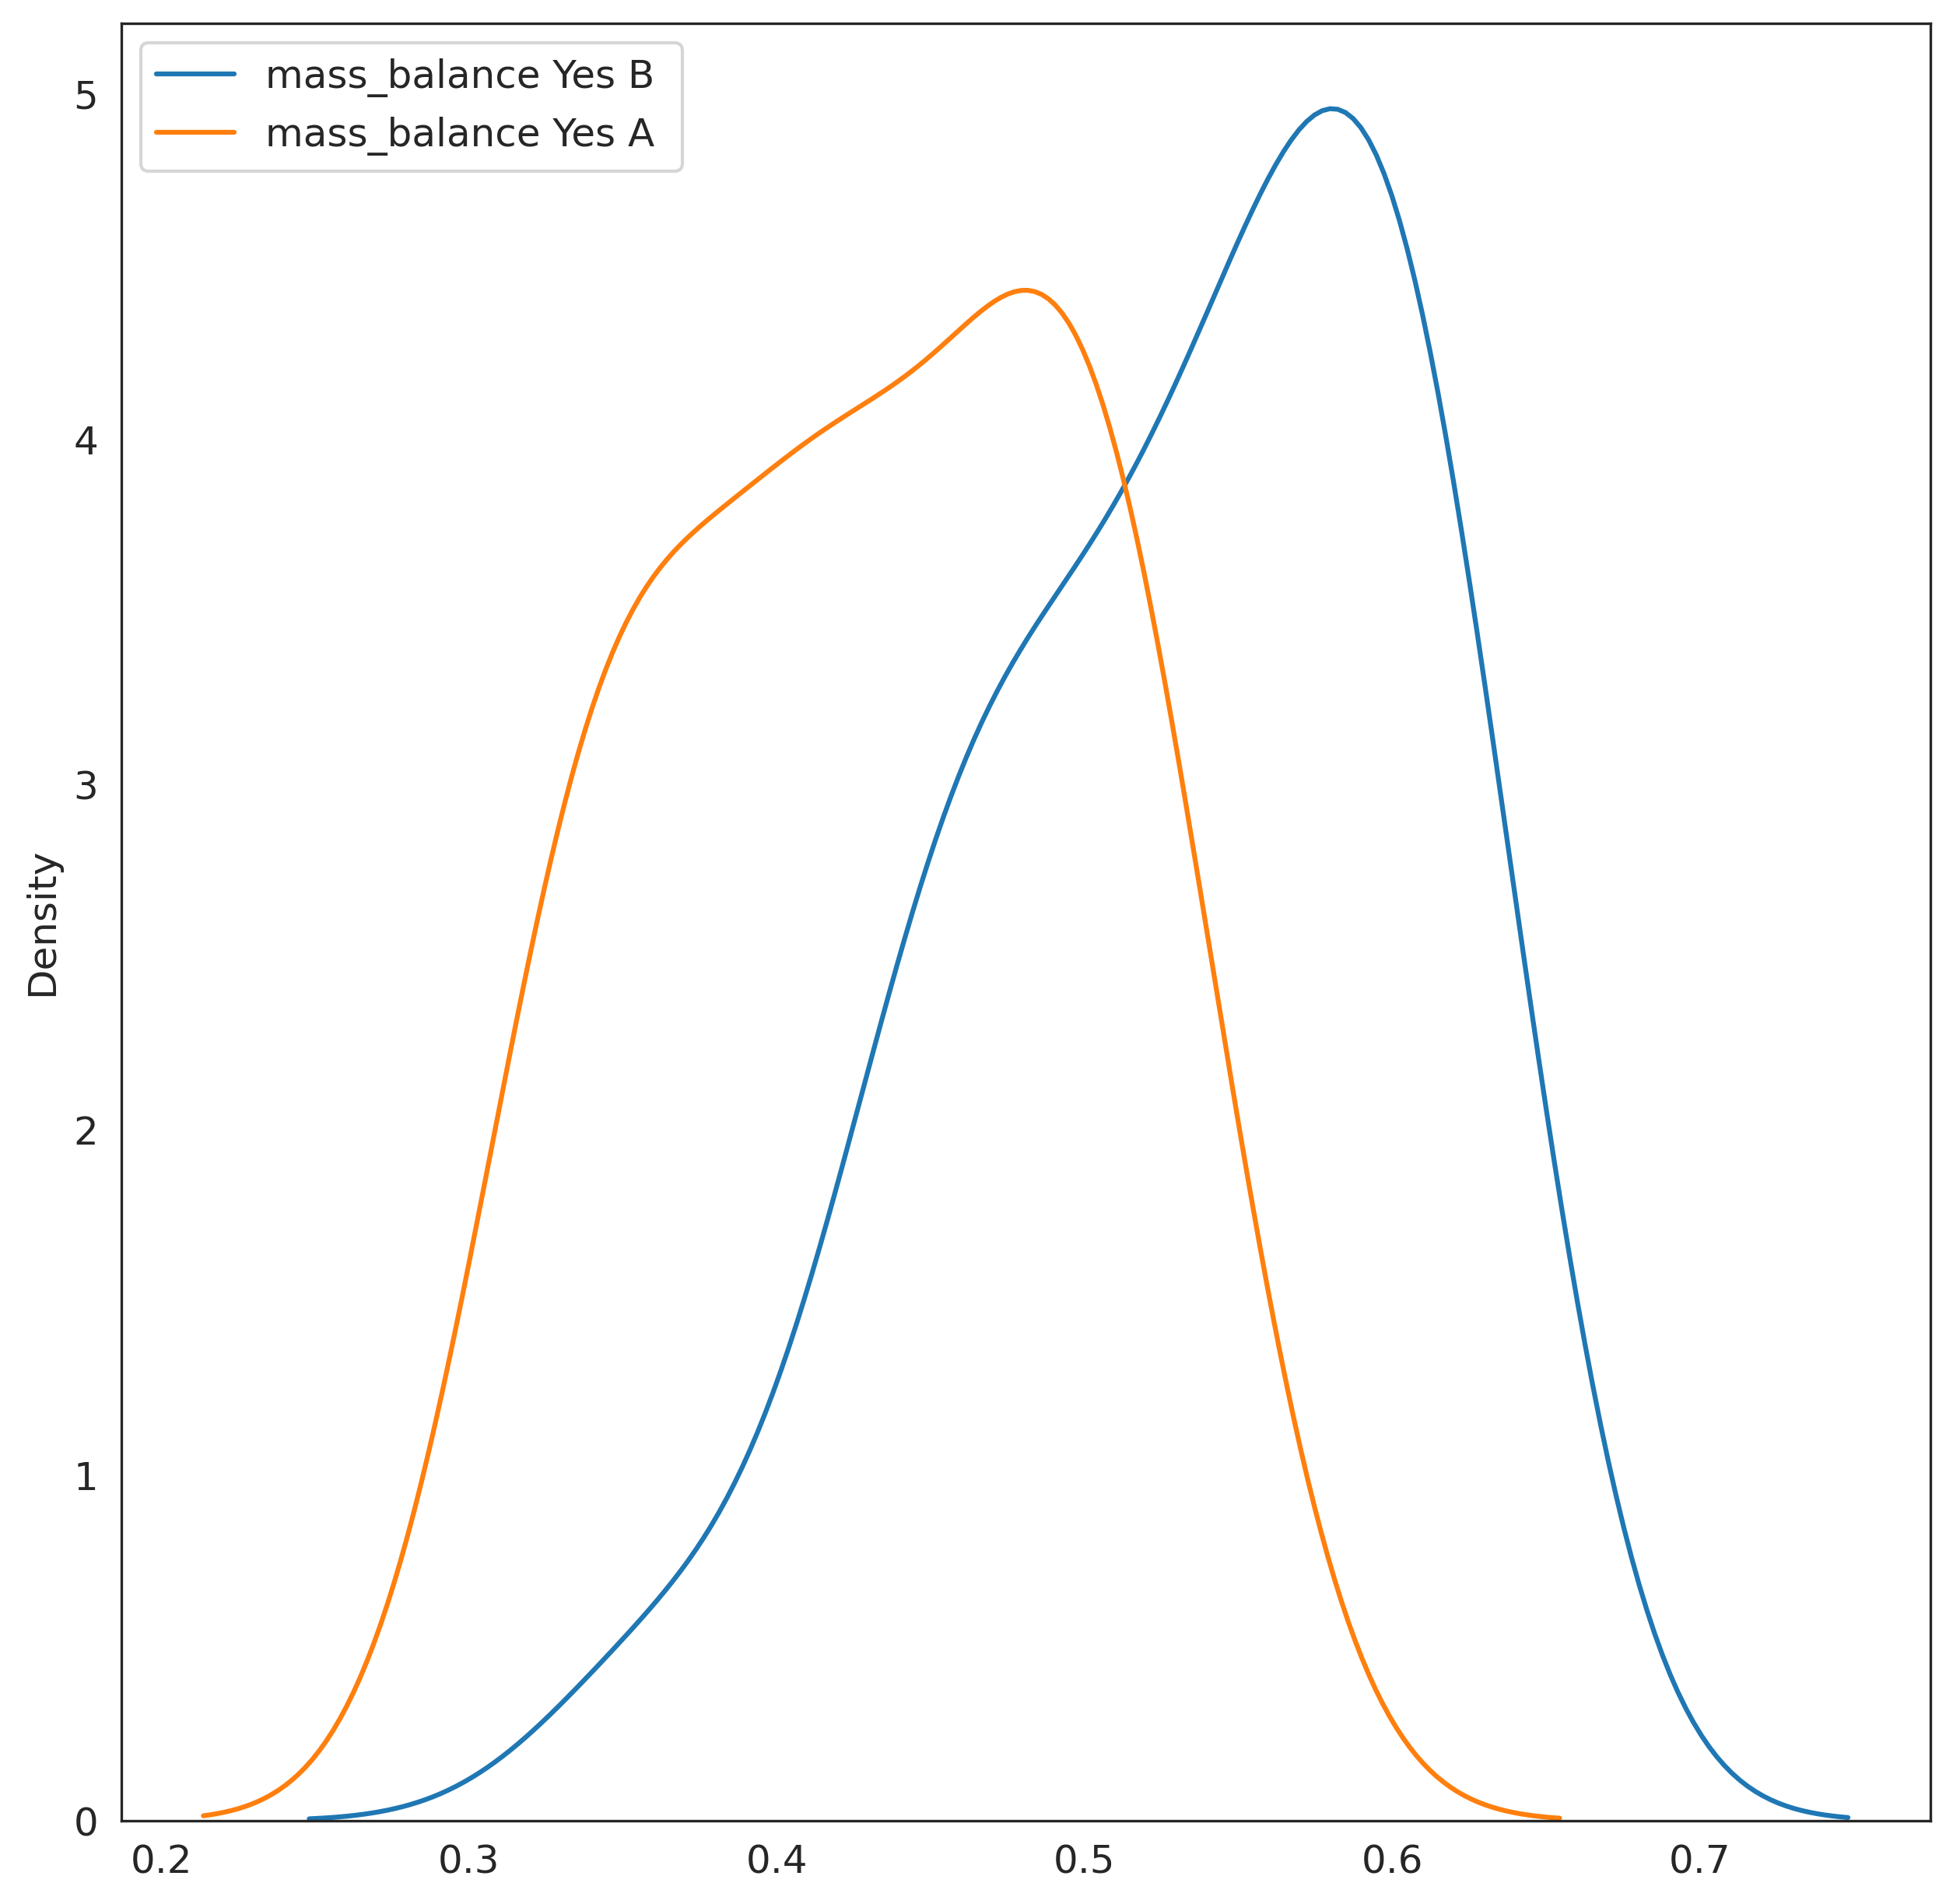

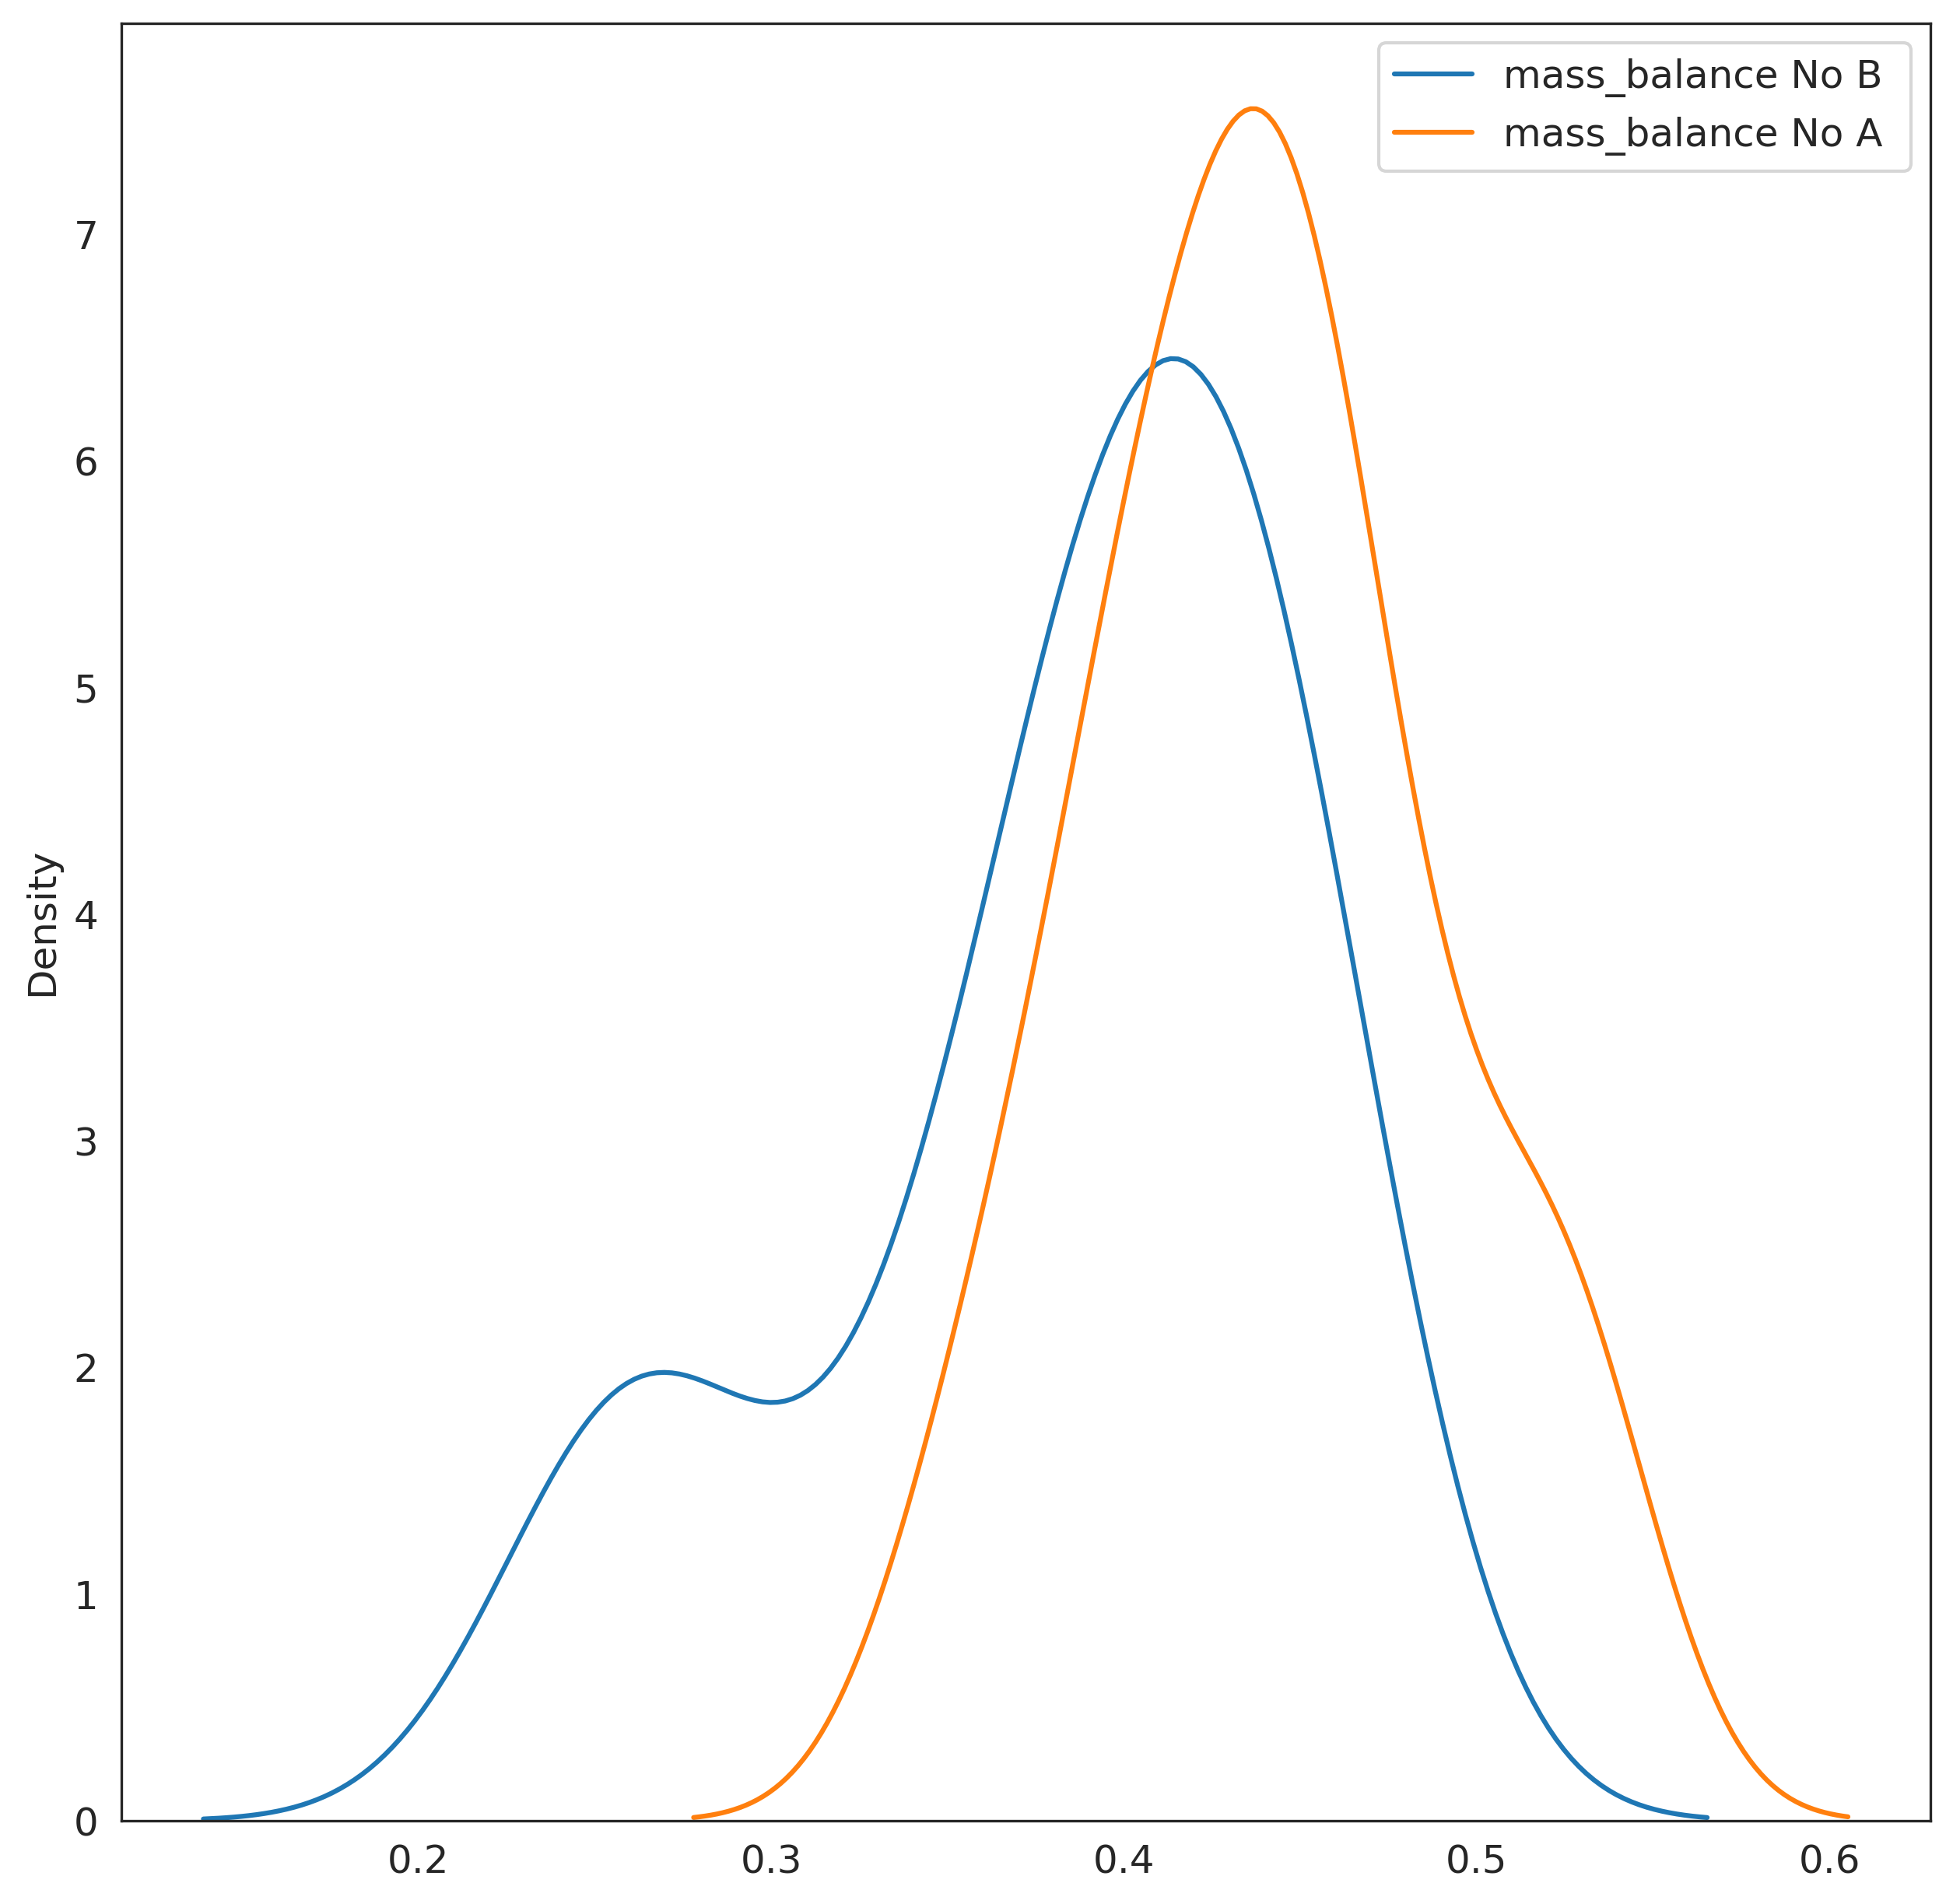

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data=valb["y"], label='mass_balance Yes B')
sns.kdeplot(data=vala["y"], label='mass_balance Yes A ')
plt.legend()
plt.show()
sns.kdeplot(data=valb["n"], label='mass_balance No B')
sns.kdeplot(data=vala["n"], label='mass_balance No A ')
#plt.hist(val["y"], density=True)
#plt.hist(val["n"],density=True)
plt.legend()
plt.show()

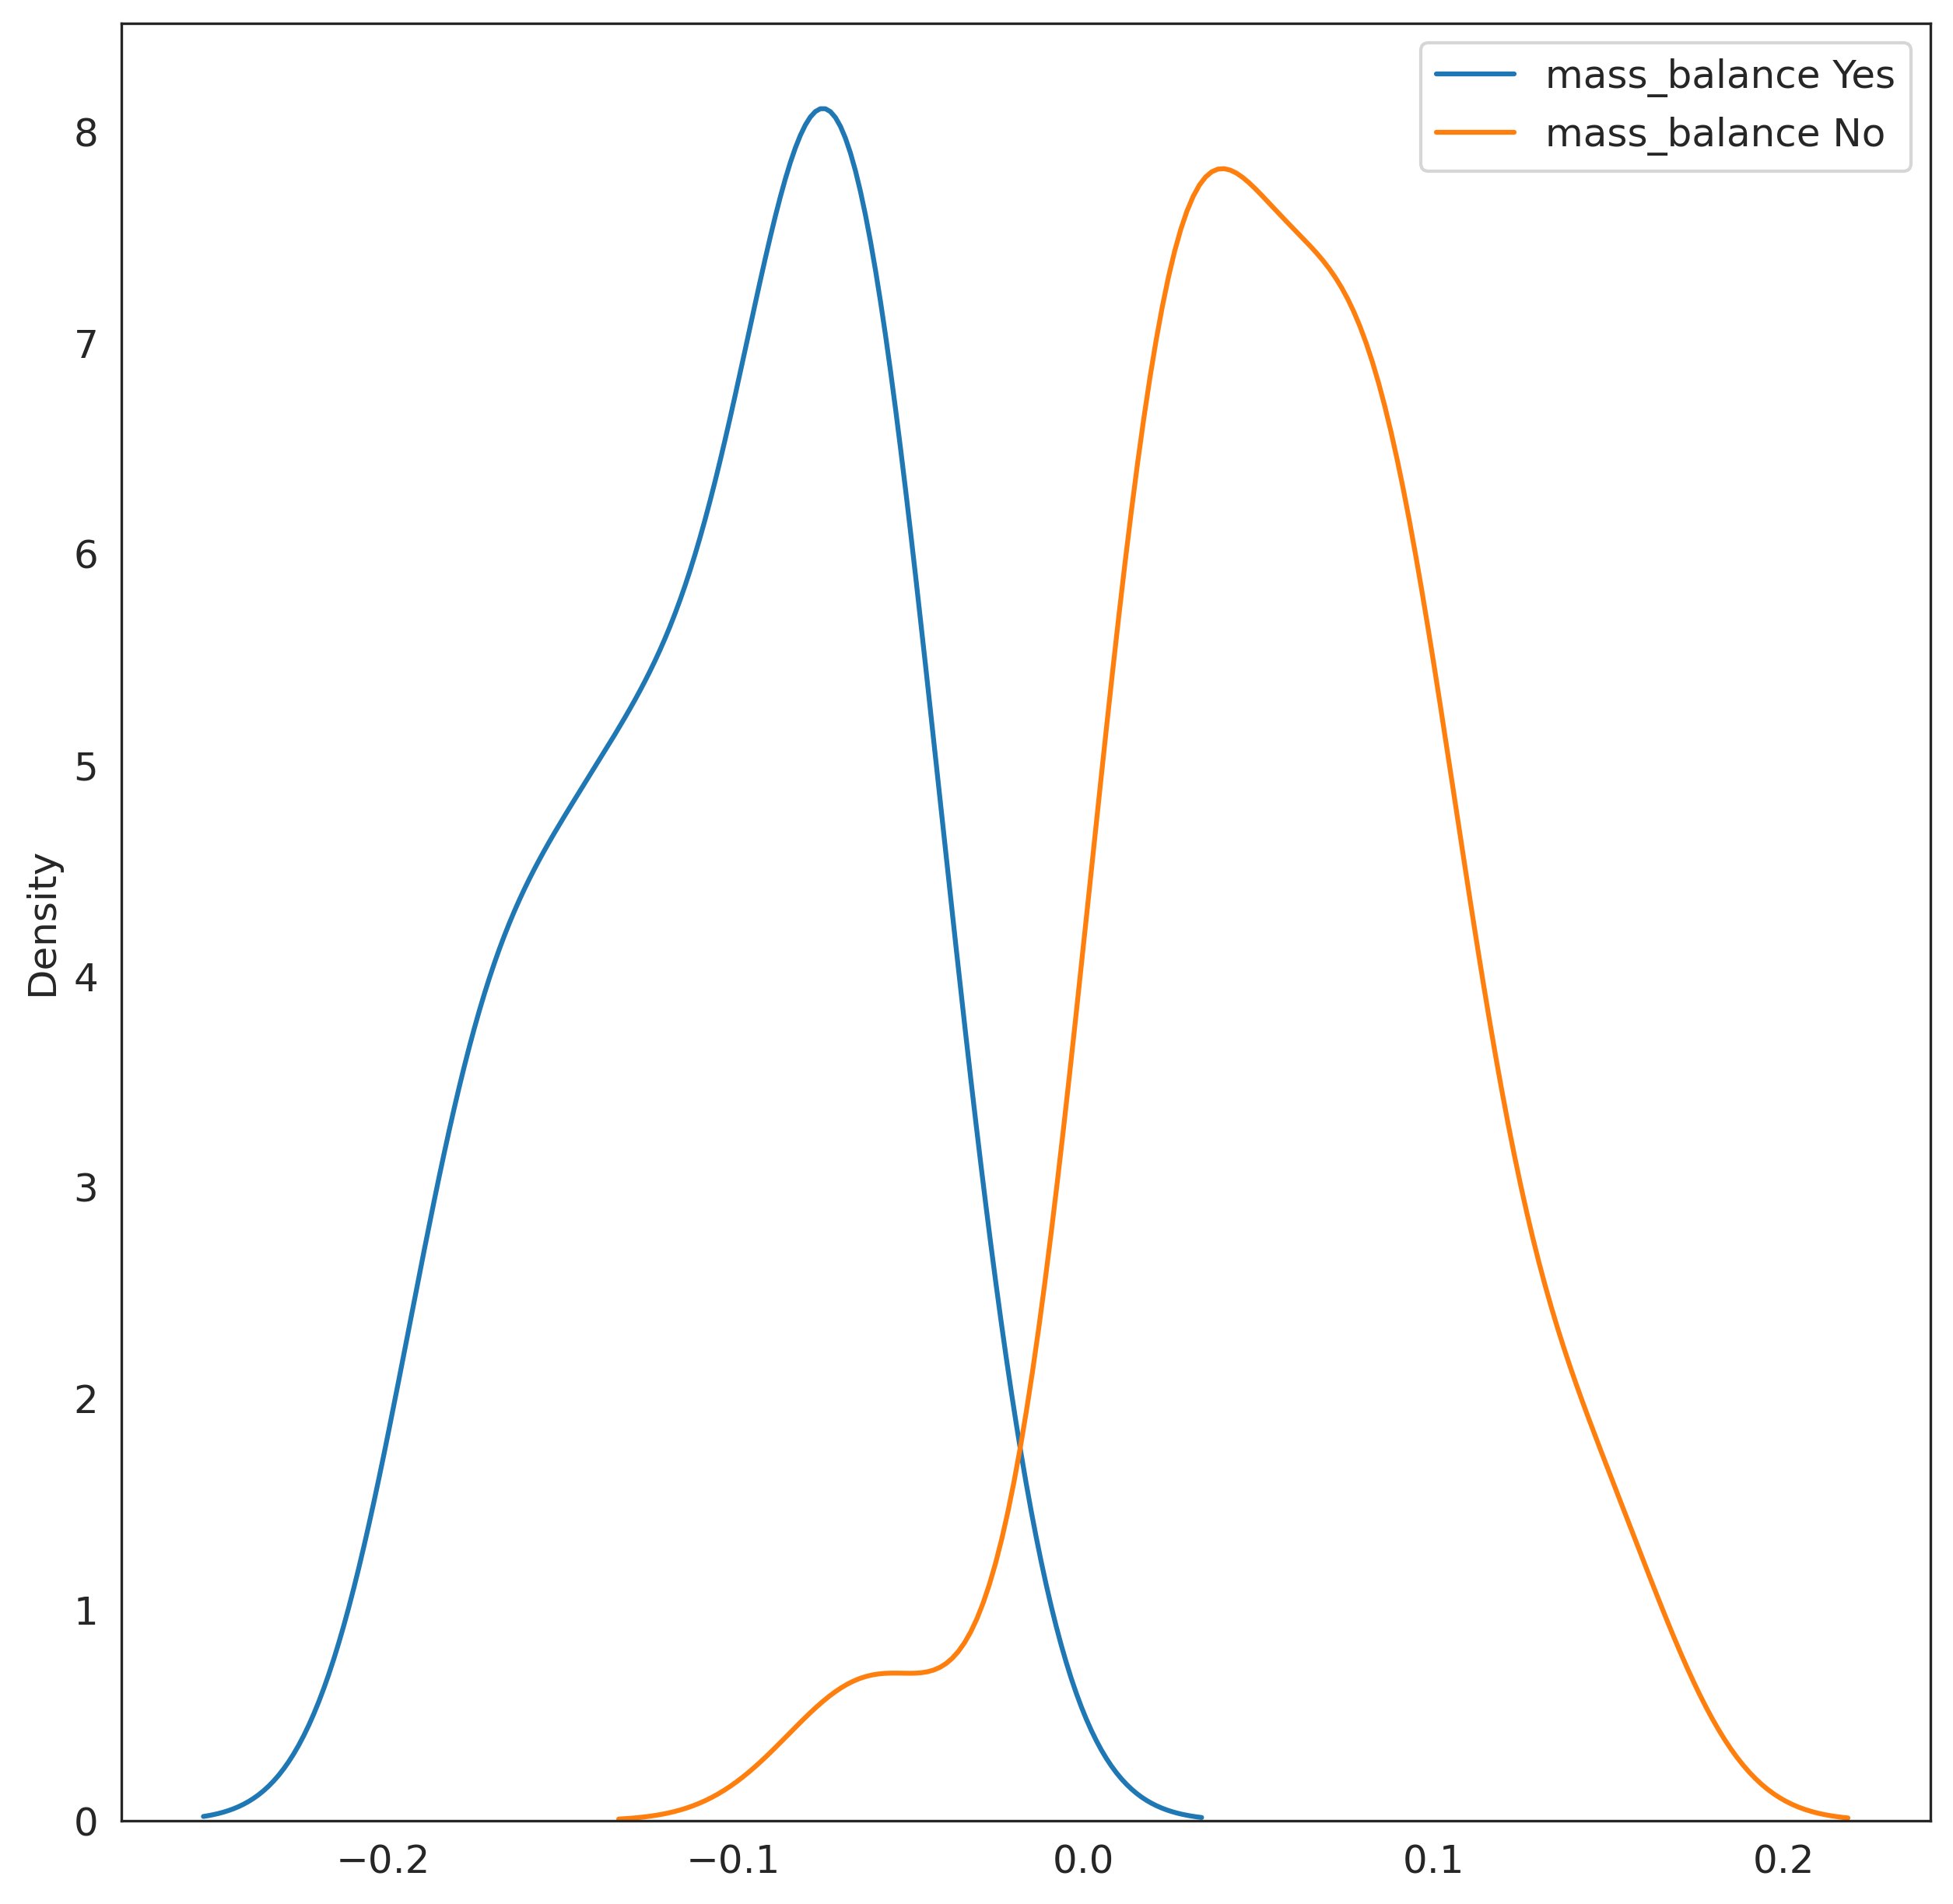

In [9]:
sns.kdeplot(data=dval["y"], label='mass_balance Yes')
sns.kdeplot(data=dval["n"], label='mass_balance No')

#plt.hist(val["y"], density=True)
#plt.hist(val["n"],density=True)
plt.legend()
plt.show()

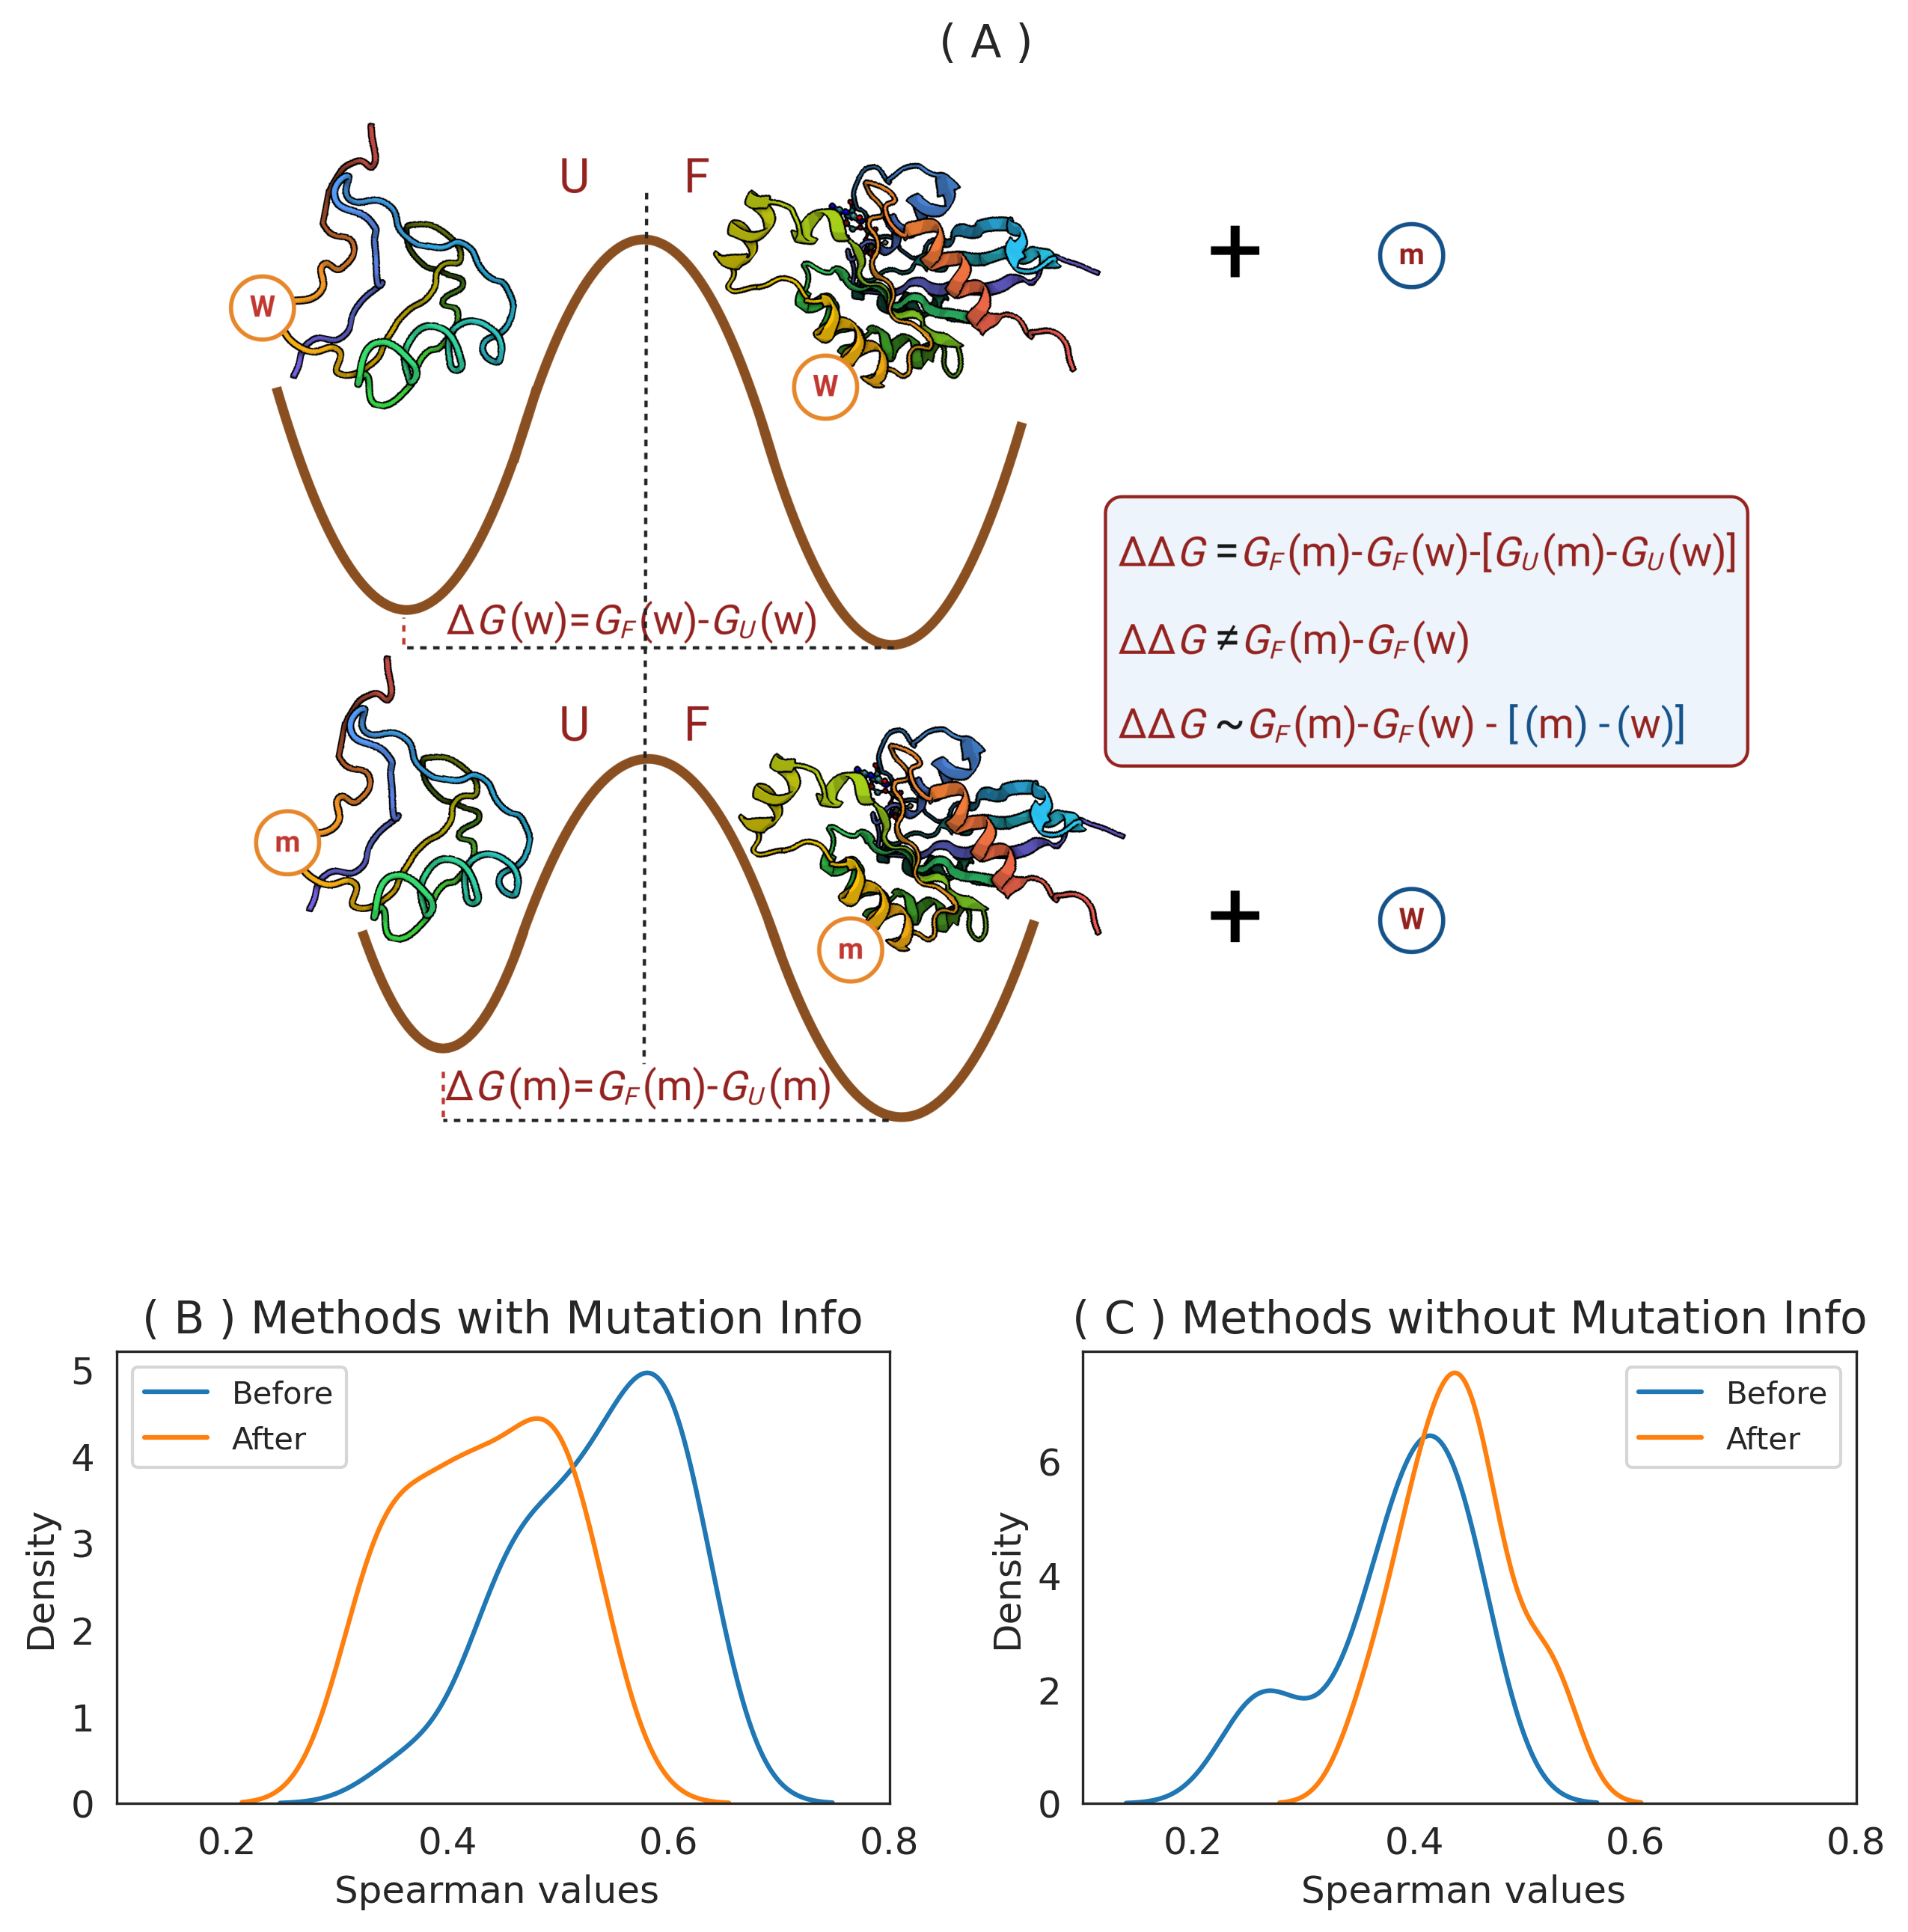

In [10]:
from matplotlib.gridspec import GridSpec

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi']=300
plt.rcParams.update({'font.size': 12})
legendsize = 10

sns. set_style('white')

#plt.subplot(2, 2, 1)

gs =  GridSpec(6, 6)    #(7,6)
gs.update(wspace = 1.5, hspace = 1.4)


ax0 = plt.subplot(gs[0:4,:])   # 0:3

ax0.set_title("( A )") 
img = plt.imread("mass_balance.png")
ax0.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
#ax0.axis('off')

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

ax0.imshow(img)
#ax0.set_xlabel("Cartoon drawing of mass balance")


lv = 4

ax1 = plt.subplot(gs[4:6,0:3]) #(3:5)

ax1.set_title("( B ) Methods with Mutation Info")
sns.kdeplot(data=valb["y"], label='Before')
sns.kdeplot(data=vala["y"], label='After')
ax1.legend(fontsize=legendsize)
plt.xlabel("Spearman values ")
ax1.legend(fontsize=legendsize)
#ax1.set_ylabel("After")
ax1.set_xlim([0.1,0.8])

ax2 = plt.subplot(gs[4:6,3:])  # 3:5
ax2.set_title("( C ) Methods without Mutation Info")
sns.kdeplot(data=valb["n"], label='Before')
sns.kdeplot(data=vala["n"], label='After')
#ax2.set_ylabel("Title 2")
#plt.xlabel("$\epsilon_k = (E_k -F)$")
plt.xlabel("Spearman values ")
ax2.legend(fontsize=legendsize)
ax2.set_xlim([0.1,0.8])


plt.savefig("Fig1.png", dpi=300, format='png') 


plt.show()

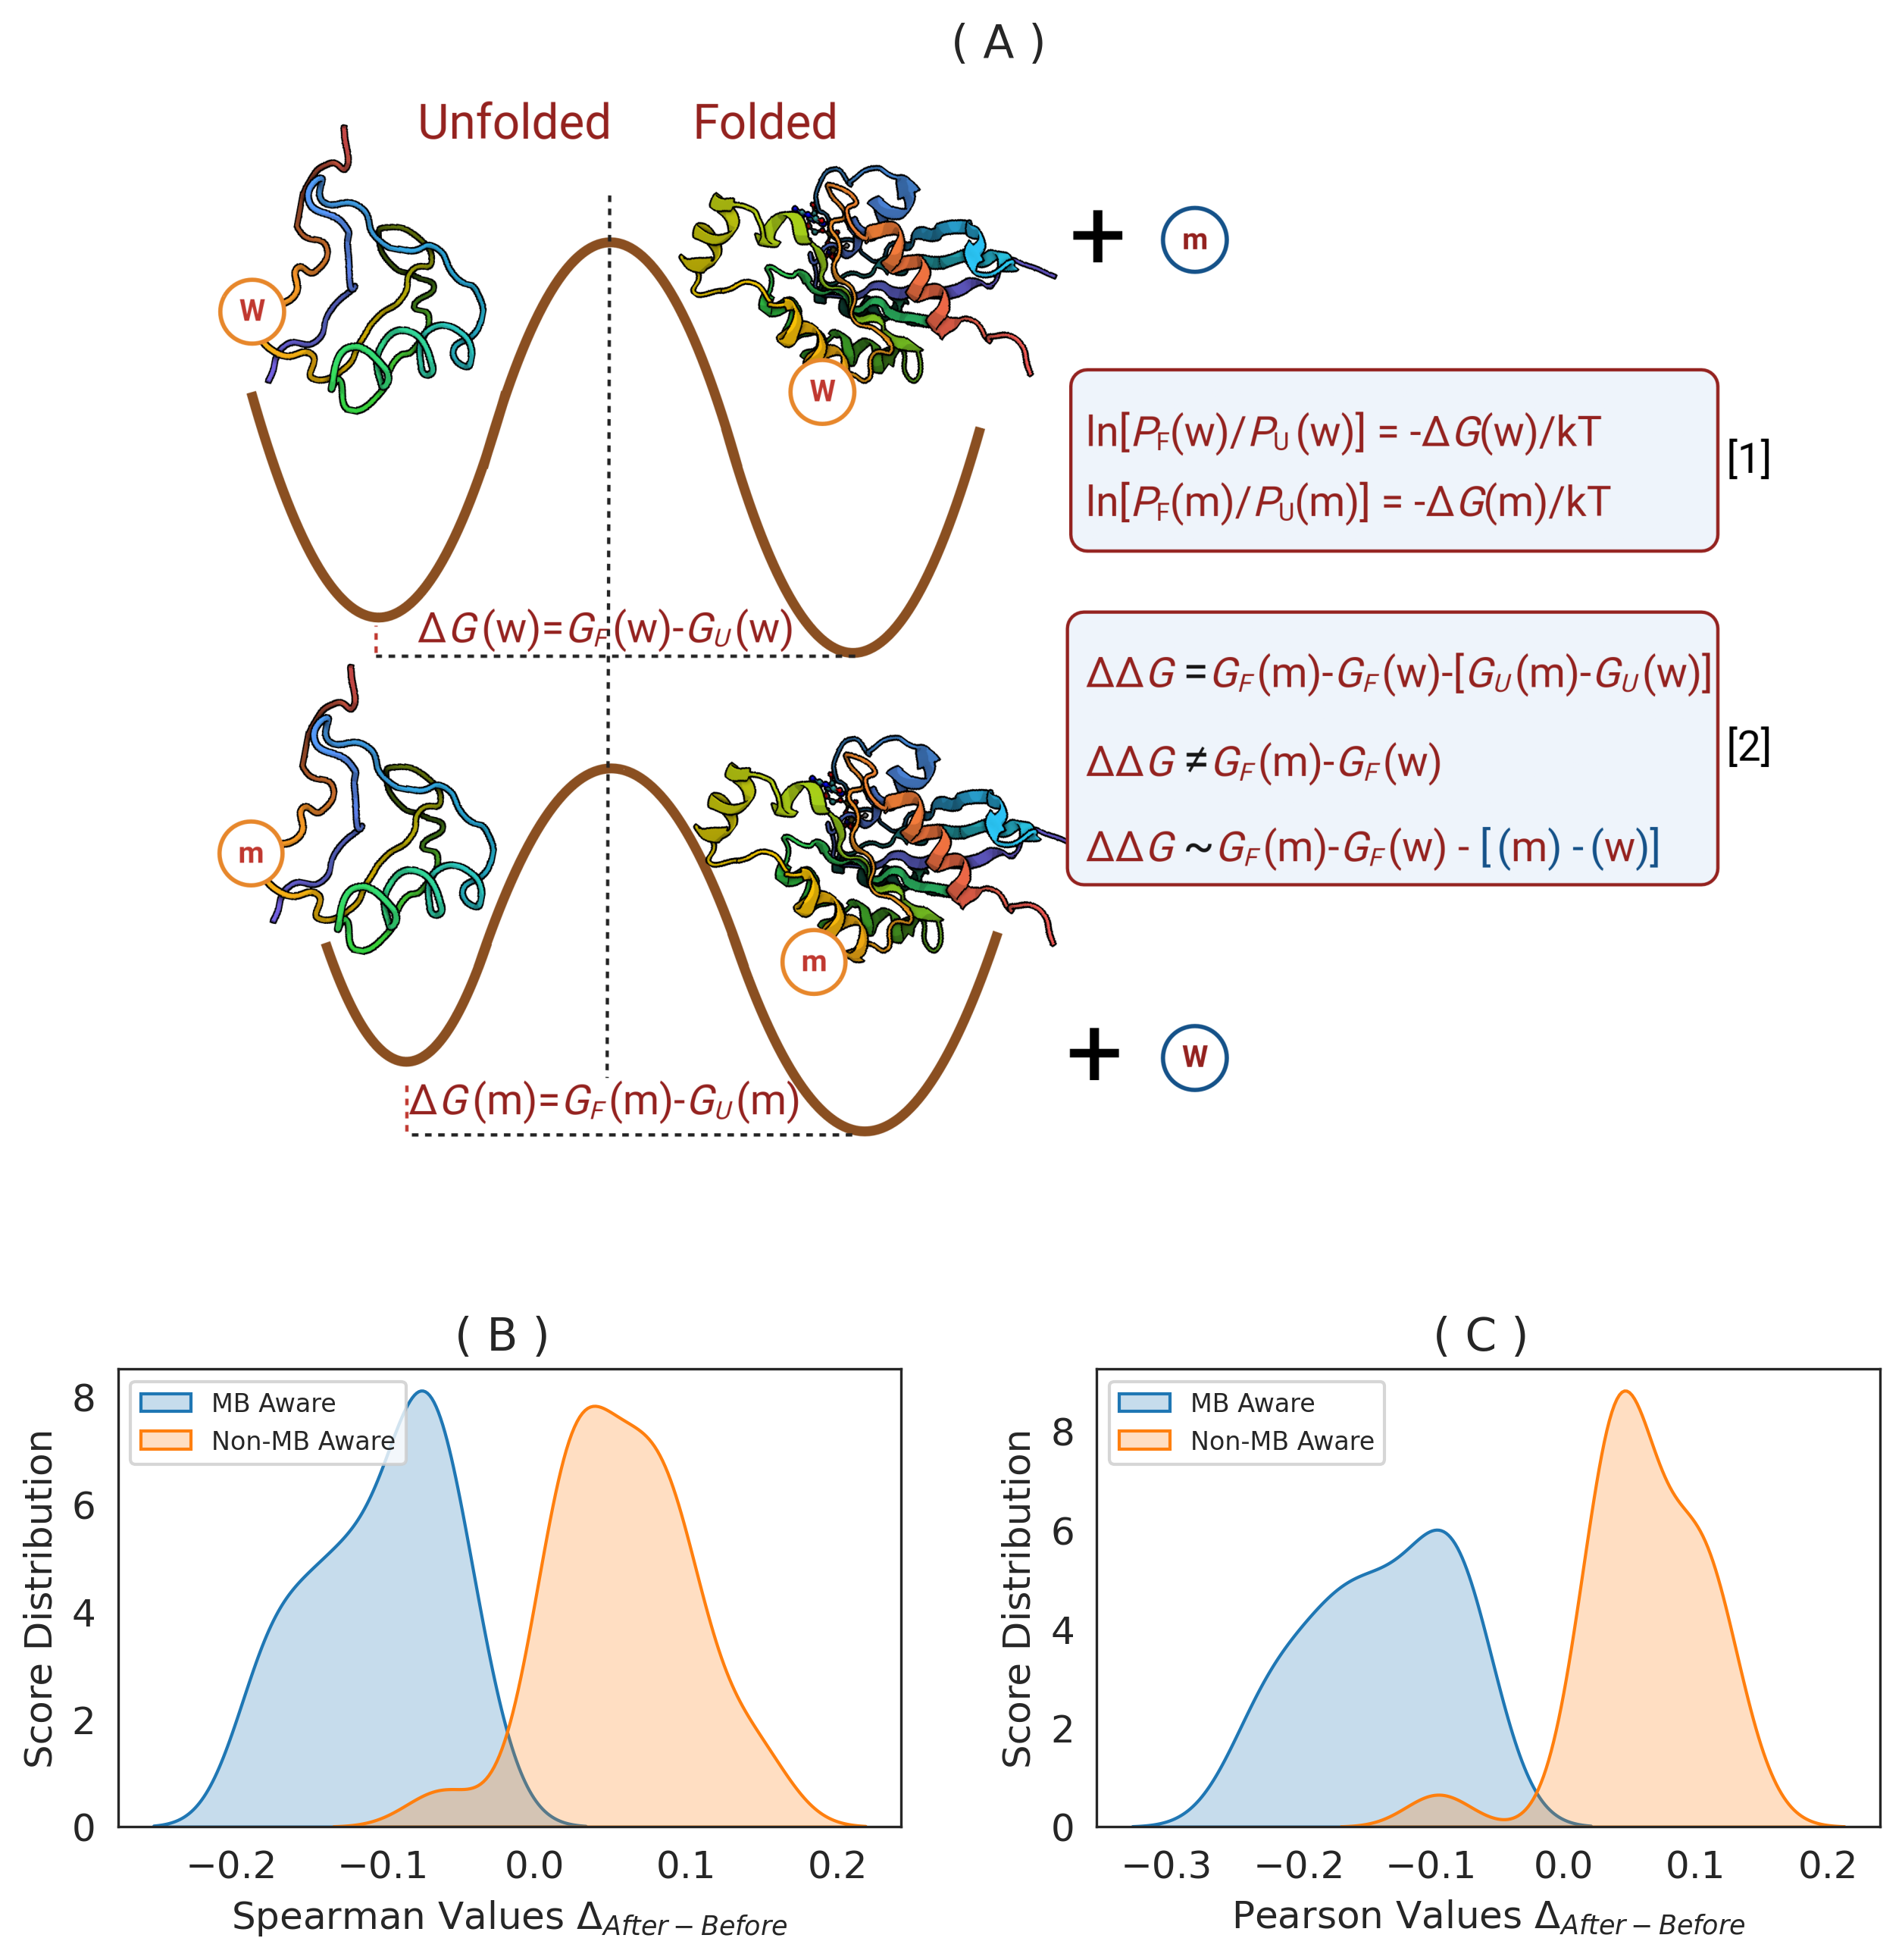

In [20]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi']=300
plt.rcParams.update({'font.size': 12})
legendsize = 8

sns. set_style('white')

#plt.subplot(2, 2, 1)

gs =  GridSpec(6, 6)    #(7,6)
gs.update(wspace = 1.5, hspace = 1.4)


ax0 = plt.subplot(gs[0:4,:])   # 0:3

ax0.set_title("( A )") 
img = plt.imread("mass_balance2.png")
ax0.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
#ax0.axis('off')

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

ax0.imshow(img)
#ax0.set_xlabel("Cartoon drawing of mass balance")


lv = 4

ax1 = plt.subplot(gs[4:6,0:3]) #ax1 = plt.subplot(gs[4:6,1:-1])

ax1.set_title("( B ) ")
sns.kdeplot(data=vala["y"]-valb["y"], label='MB Aware', fill=True)
sns.kdeplot(data=vala["n"]-valb["n"], label='Non-MB Aware', fill=True)
#sns.kdeplot(data=vala["y"], label='After')
ax1.legend(fontsize=legendsize)
plt.xlabel("Spearman Values $\Delta_{After-Before}$")
ax1.legend(fontsize=legendsize, loc="upper left")
ax1.set_ylabel("Score Distribution")
#ax1.set_xlim([0.1,0.8])


ax2 = plt.subplot(gs[4:6,3:]) #(3:5)

ax2.set_title("( C ) ")
sns.kdeplot(data=pvala["y"]-pvalb["y"], label='MB Aware', fill=True)
sns.kdeplot(data=pvala["n"]-pvalb["n"], label='Non-MB Aware', fill=True)
#sns.kdeplot(data=vala["y"], label='After')
ax2.legend(fontsize=legendsize)
plt.xlabel("Pearson Values $\Delta_{After-Before}$")
ax2.legend(fontsize=legendsize)
ax2.set_ylabel("Score Distribution")
#ax1.set_xlim([0.1,0.8])


plt.savefig("Fig1D.png", dpi=300, format='png') 


plt.show()